In [1]:
# from transformers import DistilBertTokenizer, DistilBertModel
from sentence_transformers import SentenceTransformer
import torch
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.decomposition import PCA


c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Example list of news articles
df = pd.read_csv("dataset7.csv", on_bad_lines='skip')
df

,link,title,health_annotation,content,cluster,x,y,annotation
0,https://foodbabe.com/my-visit-to-the-white-hou...,My Visit To The White House – Exposing Big Foo...,1,"Someone needs to pinch me, because I almost ca...",5,0.031964,-0.180670,0
1,https://foodbabe.com/wk-kelloggs-ceo-gary-piln...,WK Kellogg’s CEO Gary Pilnick breaks his silen...,1,WK Kellogg’s CEO Gary Pilnick finally breaks h...,0,-0.025548,-0.116120,0
2,https://foodbabe.com/general-mills-has-been-pu...,General Mills has been put on notice: Remove d...,1,Our movement is growing bigger and faster than...,0,0.068932,0.001133,0
3,https://foodbabe.com/food-policy-expert-asks-k...,Food Policy Expert asks Kellogg’s CEO: “Would ...,1,"When I saw the New York Post headline, “Ex-FDA...",0,0.026184,-0.133570,0
4,https://foodbabe.com/w-k-kelloggs-cereal-heire...,W.K. Kellogg’s Cereal Heiress Exposes Kellogg’...,1,"Ever since we delivered 400,000 signed petitio...",0,-0.009792,-0.082135,0
...,...,...,...,...,...,...,...,...
6777,https://www.eaglenews.ph/infographics-national...,In China,1,"(Eagle News) — In the Philippines, cancer rema...",3,0.235913,0.046816,1
6778,https://www.eaglenews.ph/dr-congo-ebola-death-...,unhappiness tracks poor air quality,1,"KINSHASA, DR Congo (AFP) — The death toll from...",9,0.155704,-0.329712,1
6779,https://www.eaglenews.ph/s-africas-neighbours-...,Swine flu kills 40 in western India,1,"JOHANNESBURG, South Africa (AFP) — Countries n...",9,0.046792,-0.216438,1
6780,https://www.eaglenews.ph/hong-kong-scientists-...,INFOGRAPHICS: National Cancer Consciousness Week,1,"HONG KONG, China (AFP) — Hong Kong scientists ...",9,0.216361,-0.238194,1


In [3]:
df = df.dropna(subset=['content']).reset_index(drop=True)  # Critical: reset_index
df = df[df['annotation'] == 0].reset_index(drop=True)
texts = df['content'].tolist()  # Now texts and df have identical length
print(len(texts))

3135


In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts, show_progress_bar=True)

Batches: 100%|██████████| 98/98 [05:25<00:00,  3.32s/it]


In [5]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(embeddings)

KMeans(n_clusters=5, random_state=42)

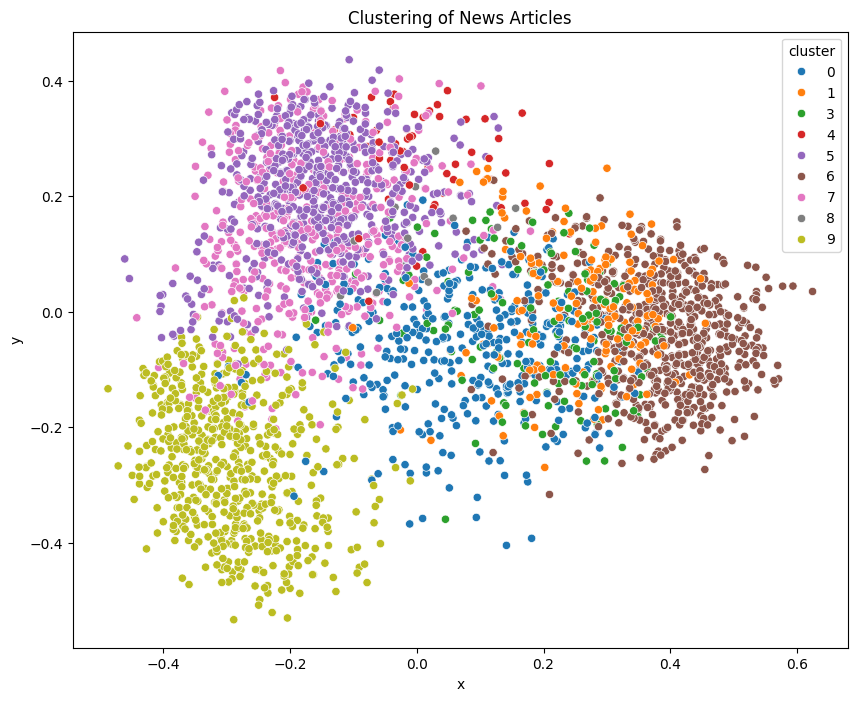

In [6]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
df['x'] = reduced_embeddings[:, 0]
df['y'] = reduced_embeddings[:, 1]
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='tab10')
plt.title("Clustering of News Articles")
plt.show()

In [7]:
# embeddings
print(len(embeddings))

3135


In [8]:
# Cluster
embeddings = np.array(embeddings)
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Map results
# for text, label in zip(df, clusters):
#     print(f"[Cluster {label}] {text}")


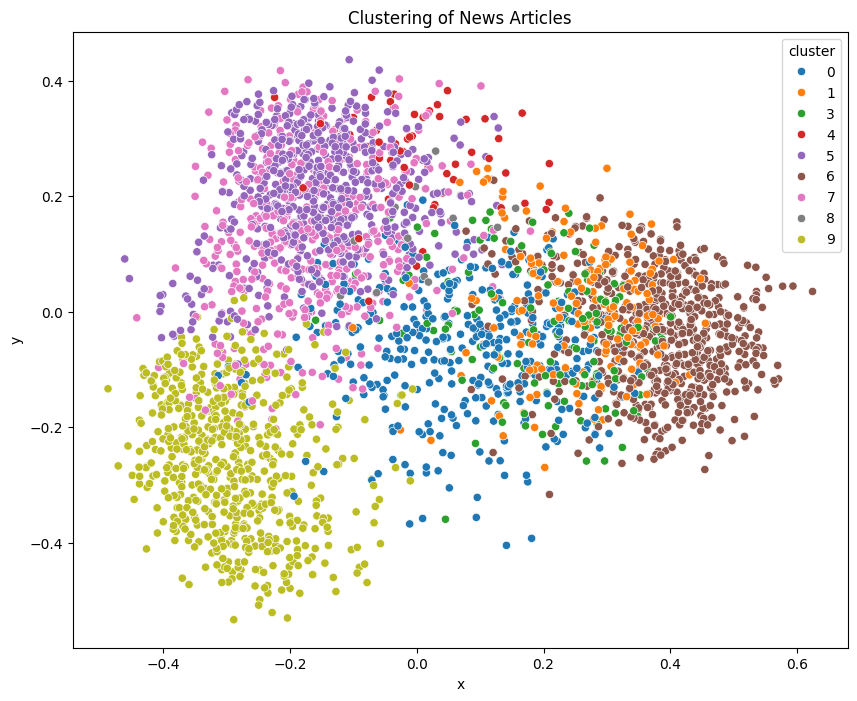

In [9]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
df['x'] = reduced_embeddings[:, 0]
df['y'] = reduced_embeddings[:, 1]
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='tab10')
plt.title("Clustering of News Articles")
plt.show()

In [10]:
# kmeans = KMeans(n_clusters=10, random_state=42)
# kmeans.fit(embeddings)
# df['cluster'] = kmeans.labels_  # Works now!

Cluster sizes:
Cluster 0: 714 articles
Cluster 1: 768 articles
Cluster 2: 522 articles
Cluster 3: 402 articles
Cluster 4: 729 articles


C:\Users\agaro\AppData\Local\Temp\ipykernel_5592\2120646061.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=cluster_labels, y=[0]*len(cluster_labels), jitter=0.25, palette="deep")


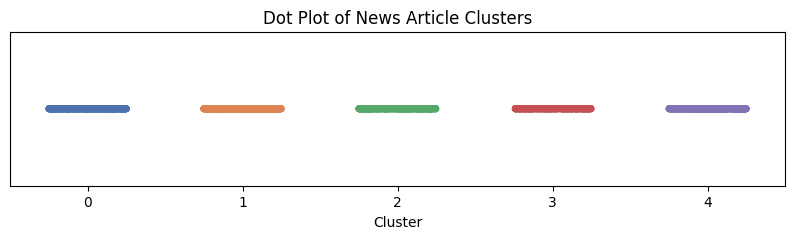


🔹 Cluster 0 examples:
• When I saw this, I couldn’t believe this was real – but it is. The Denver Broncos installed walk-thr...
• This is Shocking news. Monsanto was ordered to pay $289 million in damages after a jury found them l...
• This guest post reminds me of the time an emergency room doctor sent me home with the advice to take...
• Advertisement Dr. Joseph Mercola, an osteopathic physician, has been avoiding pork since 2018. Merco...
• A new condition called “post-vaccination syndrome” has been acknowledged by Yale scientists investig...
• Nicolas Hulscher, an epidemiologist with the McCullough Foundation, joined “Ask Dr. Drew” this week ...
• Health and Human Services Secretary Robert F. Kennedy, Jr. has paused a multi-million dollar contrac...
• Robert F. Kennedy Jr. is preparing to dismiss a number of vaccine advisors as he begins shaking up t...
• Messenger RNA molecules from the Moderna COVID-19 vaccine are able to cross the placental barrier an...
• Lawmakers in multiple

In [11]:
# Count articles in each cluster
from collections import Counter
cluster_counts = Counter(cluster_labels)

# Print cluster sizes
print("Cluster sizes:")
for cluster_id, count in sorted(cluster_counts.items()):
    print(f"Cluster {cluster_id}: {count} articles")

# 📊 Dot plot (strip style)
plt.figure(figsize=(10, 2))
sns.stripplot(x=cluster_labels, y=[0]*len(cluster_labels), jitter=0.25, palette="deep")
plt.xlabel("Cluster")
plt.title("Dot Plot of News Article Clusters")
plt.yticks([])
plt.show()

# 📌 Get example articles from each cluster
samples_per_cluster = 10
cluster_examples = {i: [] for i in range(5)}

for i, (text, label) in enumerate(zip(texts, cluster_labels)):
    if len(cluster_examples[label]) < samples_per_cluster:
        cluster_examples[label].append(text)

# Display samples
for cluster_id, examples in cluster_examples.items():
    print(f"\n🔹 Cluster {cluster_id} examples:")
    for example in examples:
        print(f"• {example[:100]}...")  # Print first 100 chars

In [12]:
df['cluster'] = cluster_labels
# Save to CSV
df.to_csv('clustered_samples_fake.csv', index=False)


In [13]:
from transformers import DistilBertTokenizer
from transformers import AutoTokenizer
from collections import Counter

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')


In [19]:
from collections import defaultdict

# Group texts by cluster
cluster_texts = defaultdict(list)
for text, cluster_id in zip(df['content'], df['cluster']):
    cluster_texts[cluster_id].append(text)



Top words for Cluster 2:
s: 1.0000
food: 0.8895
product: 0.4601
make: 0.4411
one: 0.4040
use: 0.3976
ingredient: 0.3601
will: 0.3406
health: 0.3034
people: 0.2645
found: 0.2595
time: 0.2559
new: 0.2486
don t: 0.2378
organic: 0.2287
many: 0.2274
re: 0.2210
even: 0.2206
chemical: 0.2206
may: 0.2174
need: 0.2156
used: 0.2147
made: 0.2142
eat: 0.2020
water: 0.1993
children: 0.1943
now: 0.1907
u: 0.1880
know: 0.1866
u s: 0.1848
cancer: 0.1834
g: 0.1825
contain: 0.1789
said: 0.1766
want: 0.1739
help: 0.1712
way: 0.1694
sugar: 0.1653
study: 0.1639
risk: 0.1621
year: 0.1617
linked: 0.1608
eating: 0.1562
pest: 0.1549
much: 0.1472
micro: 0.1472
body: 0.1449
recipe: 0.1404
take: 0.1399
day: 0.1390


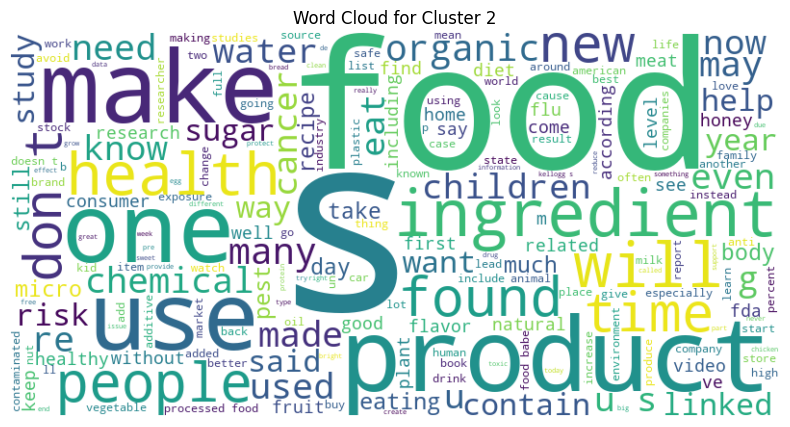


Top words for Cluster 4:
s: 1.0000
will: 0.9151
one: 0.8263
u s: 0.7844
people: 0.6476
said: 0.6422
now: 0.5894
new: 0.5888
u: 0.5520
time: 0.4581
world: 0.4356
god: 0.4273
israel: 0.4100
source: 0.3996
even: 0.3685
many: 0.3616
see: 0.3515
year: 0.3308
today: 0.3171
american: 0.3076
day: 0.2975
say: 0.2966
way: 0.2850
know: 0.2776
trump: 0.2637
government: 0.2580
come: 0.2568
well: 0.2556
state: 0.2553
according: 0.2553
made: 0.2539
re: 0.2533
first: 0.2533
war: 0.2500
jesus: 0.2458
may: 0.2450
united states: 0.2405
used: 0.2387
going: 0.2384
use: 0.2375
bank: 0.2289
thing: 0.2262
law: 0.2224
un: 0.2215
back: 0.2206
including: 0.2200
children: 0.2182
make: 0.2159
much: 0.2153
technology: 0.2096


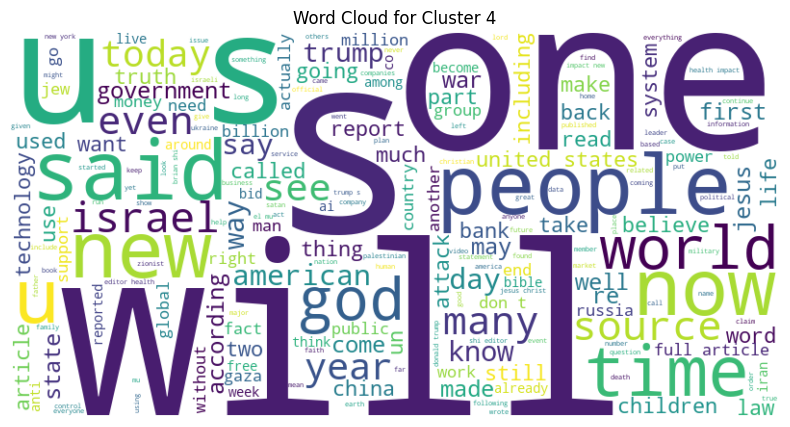


Top words for Cluster 1:
s: 1.0000
body: 0.9701
food: 0.8483
help: 0.7659
one: 0.7067
cause: 0.6588
blood pressure: 0.6543
make: 0.6176
number: 0.6080
may: 0.6063
people: 0.5962
re: 0.5826
found: 0.5787
risk: 0.5510
diet: 0.4980
contain: 0.4772
vitamin d: 0.4687
skin: 0.4602
time: 0.4597
use: 0.4535
health: 0.4320
increase: 0.4253
even: 0.4219
blood sugar: 0.4162
nutrient: 0.4146
symptoms: 0.4100
fruit: 0.4016
lead: 0.3869
inflammation: 0.3835
brain: 0.3768
benefit: 0.3644
day: 0.3531
supplement: 0.3531
need: 0.3497
eating: 0.3497
video: 0.3474
anti: 0.3362
eat: 0.3356
condition: 0.3294
reduce: 0.3266
study: 0.3260
take: 0.3249
heart disease: 0.3221
heart: 0.3209
cell: 0.3170
used: 0.3170
diabetes: 0.3170
level: 0.3164
include: 0.3158
healthy: 0.3153


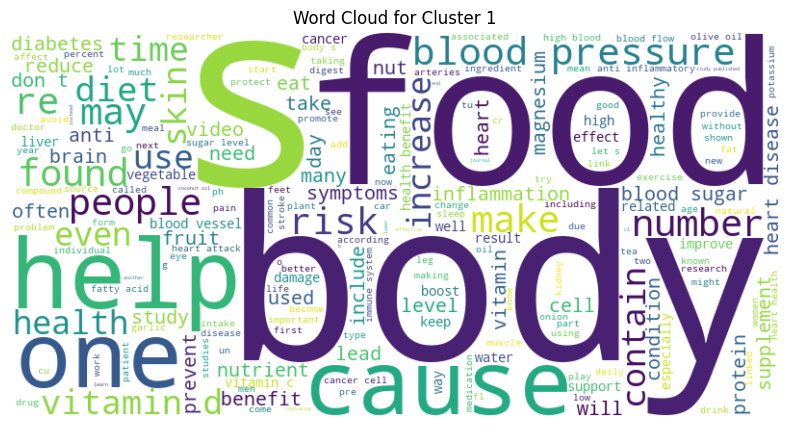


Top words for Cluster 3:
s: 1.0000
children: 0.6159
one: 0.4936
said: 0.4152
state: 0.3897
will: 0.3770
people: 0.3576
new: 0.3016
parent: 0.2807
case: 0.2766
time: 0.2756
now: 0.2562
law: 0.2384
child: 0.2369
u s: 0.2226
life: 0.2206
video: 0.2068
family: 0.2033
many: 0.2028
transgender: 0.2012
even: 0.1997
year: 0.1946
report: 0.1814
say: 0.1742
according: 0.1722
women: 0.1717
day: 0.1701
right: 0.1681
abortion: 0.1681
doctor: 0.1666
first: 0.1661
u: 0.1661
home: 0.1651
see: 0.1620
government: 0.1533
related: 0.1513
including: 0.1503
re: 0.1477
know: 0.1437
support: 0.1426
medical: 0.1411
world: 0.1406
patient: 0.1396
way: 0.1386
two: 0.1365
public: 0.1355
use: 0.1350
may: 0.1345
american: 0.1330
much: 0.1325


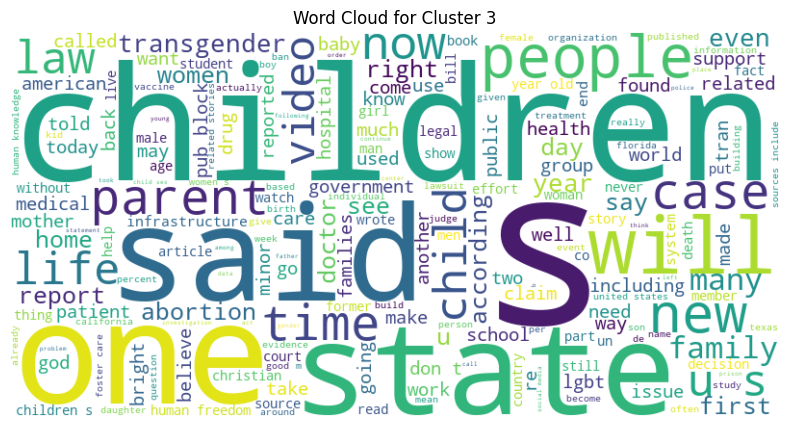


Top words for Cluster 0:
vaccine: 1.0000
s: 0.6864
co vaccine: 0.5032
said: 0.4895
people: 0.4807
new: 0.4246
one: 0.4197
will: 0.3876
co: 0.3426
va: 0.3350
u s: 0.3171
now: 0.2991
time: 0.2793
case: 0.2781
patient: 0.2659
death: 0.2560
children: 0.2446
according: 0.2419
many: 0.2350
p: 0.2335
even: 0.2224
doctor: 0.2221
report: 0.2182
year: 0.2114
may: 0.2106
re: 0.2011
government: 0.1973
public: 0.1870
state: 0.1843
cancer: 0.1793
virus: 0.1789
drug: 0.1778
study: 0.1774
risk: 0.1744
data: 0.1732
pan: 0.1728
including: 0.1725
reported: 0.1717
first: 0.1679
hospital: 0.1633
million: 0.1614
research: 0.1595
disease: 0.1576
much: 0.1545
told: 0.1545
cdc: 0.1541
know: 0.1534
bird flu: 0.1534
used: 0.1530
human: 0.1522


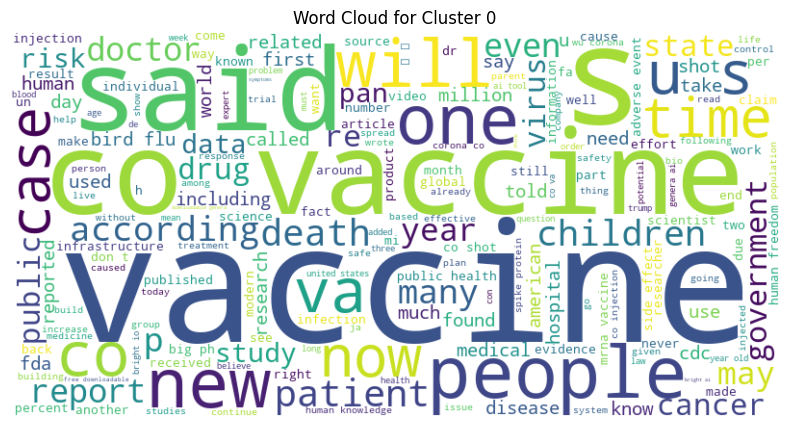

In [22]:
from wordcloud import WordCloud

# Tokenize and count using transformer tokenizer
for cluster_id, texts in cluster_texts.items():
    all_text = " ".join(texts)
    tokens = tokenizer.tokenize(all_text)
    
    # Optional: remove special tokens like [CLS], [SEP], ##subwords
    cleaned_tokens = [t for t in tokens if not t.startswith('##') and t.isalpha()]

    counts = Counter(cleaned_tokens)

    # print(f"\n[DistilBERT Tokenizer] Top words for Cluster {cluster_id}:")
    # for word, freq in counts.most_common(20):
    #     print(f"{word}: {freq}")

    # Optionally generate a word cloud from cleaned tokens (join into string)
    wordcloud_input = " ".join(cleaned_tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(wordcloud_input)

    top_words = wordcloud.words_

    # Print top 20 words and weights
    print(f"\nTop words for Cluster {cluster_id}:")
    for word, score in list(top_words.items())[:50]:
        print(f"{word}: {score:.4f}")

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.show()
